In [1]:
import torch
import matplotlib.pyplot as plt

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: # To be able to import files 
    sys.path.append(module_path) # without installing the project

from src.dataload import *
from src.gan_architecture import *
from src.utils import *
from src.lightning_model import GANDataModule, GAN 

In [2]:
torch.cuda.is_available()

True

In [3]:
ds = '../data/lhq_256'
bs = 128
rescale_size = 140
crop_size = 128

data = GANDataModule(data_dir=ds, batch_size=bs, 
                    rescale=rescale_size, crop=crop_size)
data.setup()

## Parameters

Loaded image shape in tensor: torch.Size([128, 3, 128, 128])


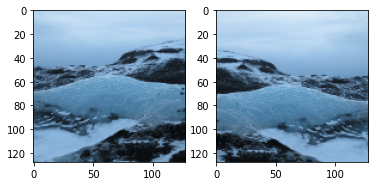

In [4]:
batch_size = 16

val_loader = data.val_dataloader()

# get minibatch
x = next(iter(val_loader))
x_test = next(iter(val_loader))


print('Loaded image shape in tensor:', x.size())
fig,axes = plt.subplots(1,2);
img1 = (minmax_scale(x, 0, 1))[0].numpy().transpose((1, 2, 0))
img2 = minmax_scale(x_test, 0, 1)[0].detach().numpy().transpose((1, 2, 0))
axes[0].imshow(img1); # .transpose((1, 2, 0))
axes[1].imshow(img2);

In [5]:
x.min(), x.max()

(tensor(0.), tensor(1.))

## Test trained model

In [6]:
model = GAN.load_from_checkpoint('../lightning_logs/gan/version_0/checkpoints/epoch=1-step=1336.ckpt')
gen = model.generator
debug = True

Shape : torch.Size([4, 3, 128, 128])


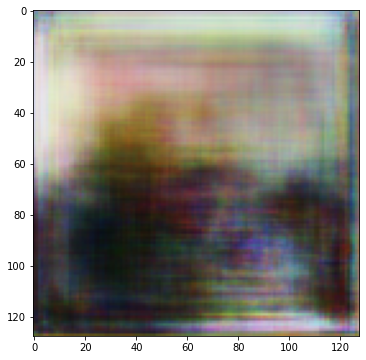

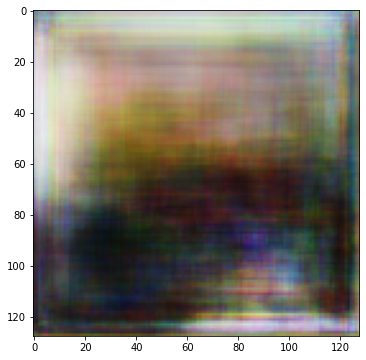

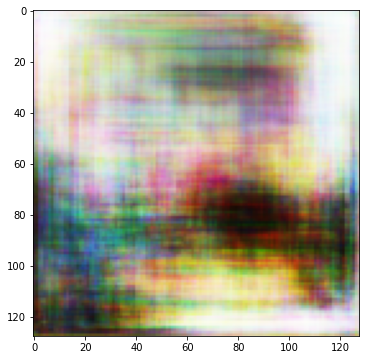

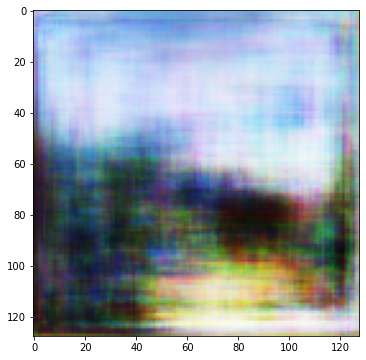

In [10]:
z = torch.randn(4, model.latent_dim)
generated = model(z)
print(f"Shape : {generated.shape}")

for i in range(4):
    fig,axes = plt.subplots(1,1, figsize=(6,6))
    axes.imshow(generated[i].cpu().detach().numpy().transpose((1, 2, 0)))